# **Ejemplos de clustering con Python**
PARTE I: clustering aglomerativo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



**Generamos datos de dos bivariadas normales**

In [21]:
df1 = pd.DataFrame({'x':np.random.normal(0, 1, 200),
                    'y': np.random.normal(0, 1, 200)})

df2 = pd.DataFrame({'x':np.random.normal(5, 1, 200),
                    'y': np.random.normal(5, 1, 200)})

frames = [df1, df2]

data = pd.concat(frames)

In [22]:
data.head()

,x,y
0,0.530859,-1.008197
1,-0.841881,-0.094778
2,1.600920,0.209619
3,-1.042756,1.450470
4,0.150998,-0.192402


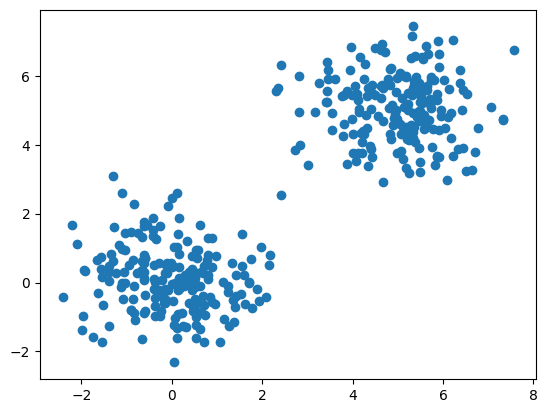

In [23]:
plt.scatter(data['x'],data['y'])
plt.show()



Una **primera opción** para hacer agrupamiento aglomerativo (agrupamiento jerarquico) es usar *AgglomerativeClustering* de
**sklearn**

Uno no puede sacar directamente el dendograma. Permite saber en cuál grupo queda cada observación si cortas el dendograma tal que uno obtiene un número determinado de grupos (n_clusters).


In [24]:
from sklearn.cluster import AgglomerativeClustering

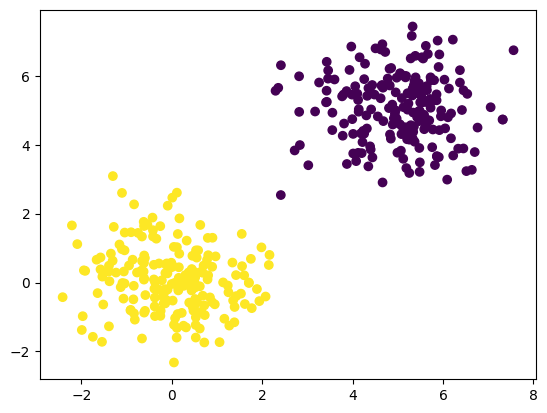

In [25]:

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['x'],data['y'], c=labels)
plt.show()

Una segunda opción es linkage de **scipy**

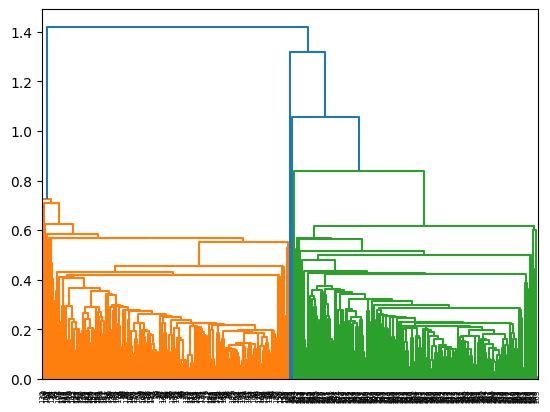

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

linkage_data = linkage(data, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()

Para saber en cuál grupo una observación queda al cortar tal que el número de grupos es igual a lo que uno especifica:

In [44]:
h_cluster_id = cut_tree(linkage_data, n_clusters=2)

In [ ]:
h_cluster_id

Una función que permite usar dendogram de scipy con la salida que da  Agglomerative Clustering de Sklearn,
Referencia: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [30]:
from scipy.cluster.hierarchy import dendrogram

In [31]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

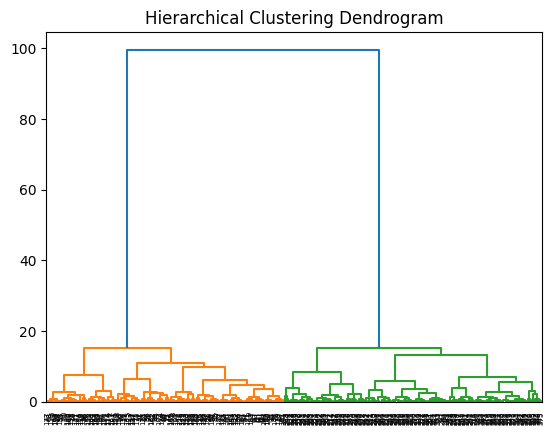

In [41]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)

**Hacer heatmap y clustering**

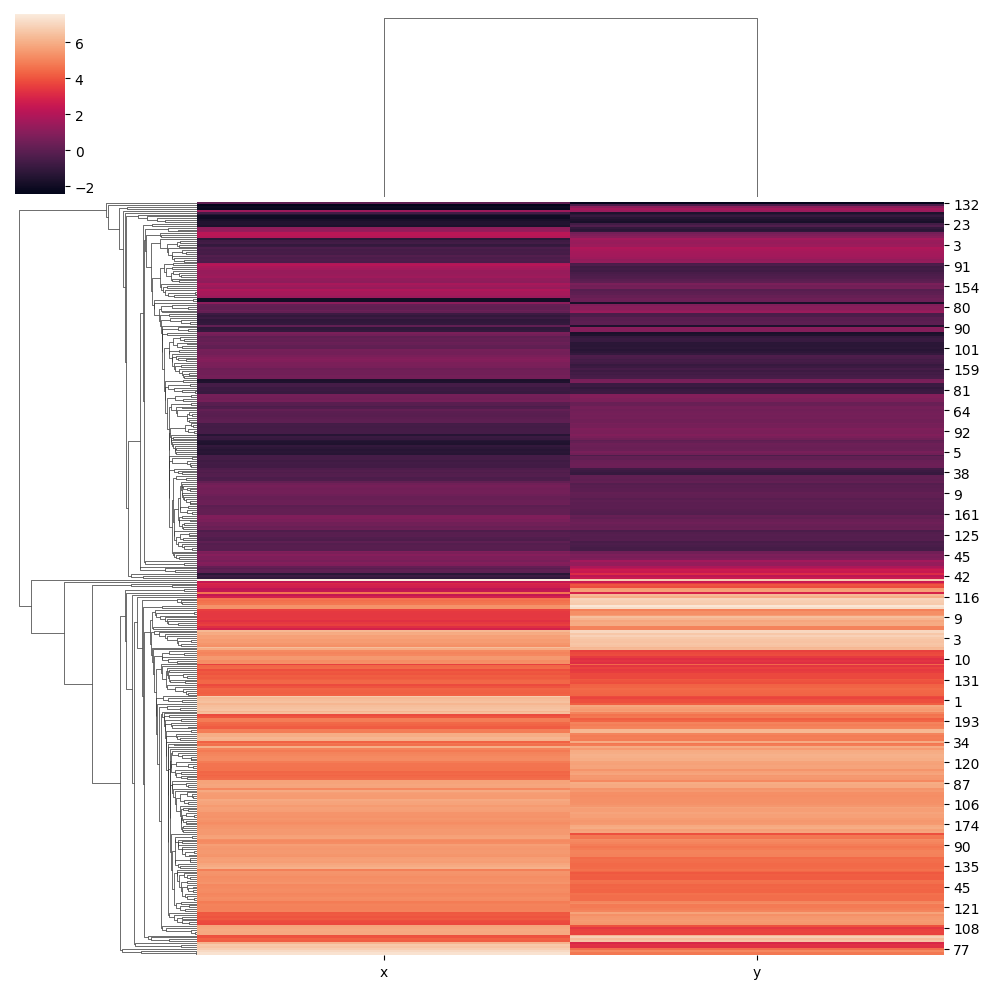

In [33]:
import seaborn as sns;


link_fun = 'single'
row_link = linkage(data, method = link_fun)
col_link = linkage(data.transpose(), method = link_fun,metric = 'correlation')
g = sns.clustermap(data, row_linkage=row_link, col_linkage=col_link)


## **Parte II:
```
```

K means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(data)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


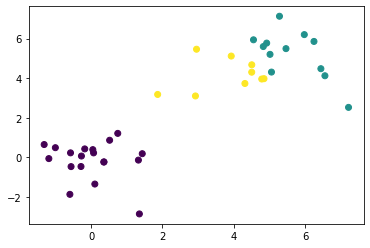

In [ ]:
plt.scatter(x, y, c=labels)
plt.show()

Obtener y dibujar centroids de cada cluster (con simbolo *)

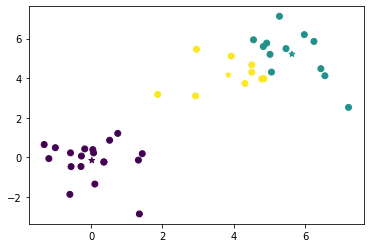

In [ ]:
plt.scatter(x, y, c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c=[0,1,2],marker='*')
plt.show()

Para ver cómo evoluciona la variabilidad promedia dentro de cada cluster en función con el número de clusters


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

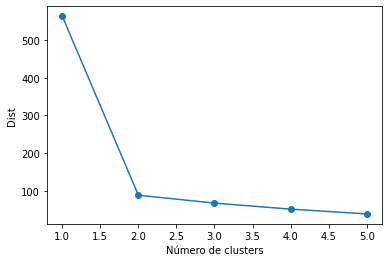

In [ ]:
dist=[]
for i in range(1, 6):
  km = KMeans(n_clusters=i)
  km.fit(data)
  dist.append(km.inertia_)

plt.plot(range(1, 6), dist, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Dist')
plt.show()